We're going to use `PerformanceAnalytics` library for performance and risk analysis. (https://github.com/justthetips/PerformanceAnalytics)

Use `pip` to install `PerformanceAnalytics`

In [1]:
!pip install PerformanceAnalytics

Import 'performanceanalytics' library and statistics class.
Import 'performanceanalytics' library and table.table.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import performanceanalytics.statistics as pas
import performanceanalytics.table.table as pat
%matplotlib inline

Read the return data of 7 tickers you made before.

In [5]:
returns = pd.read_csv("hist_return.csv", index_col='Date', parse_dates=True).dropna()
returns

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR
Date,,,,,,,
2017-03-28,0.007360,0.000000,-0.001586,0.001661,-0.000677,0.007599,0.007973
2017-03-29,0.001478,0.005694,0.003773,0.002487,0.003484,0.003594,0.002637
2017-03-30,0.002530,0.000000,-0.001780,-0.005375,-0.000579,0.004873,0.008473
2017-03-31,-0.001935,-0.002343,0.001189,-0.006651,-0.000386,0.000351,0.001884
2017-04-03,-0.001686,-0.006184,0.002480,0.006487,0.002862,-0.005198,-0.018363
...,...,...,...,...,...,...,...
2019-12-24,0.000124,-0.003621,0.000769,-0.001684,0.001002,-0.000097,0.002741
2019-12-26,0.005176,0.007096,0.000768,0.007874,-0.000728,0.002188,-0.001307
2019-12-27,-0.000185,0.001203,0.001536,0.004278,0.000911,-0.001649,-0.004522


First, we define the constants below to calculate the annual data we need. We assume 252 trading days in a year and use the square root of 252 to calculate the annualized rate from daily data. Risk-free rate is set to `0.0`.

In [6]:
ROOT_OF_252 = 252 ** 0.5
rf = 0.0

We use ‘apply()’ so that the lambda function we define will be applied to every column in the data frame. The lambda function applies ‘annualized_return’ to every row of the data. ‘annualized_return’  function has inputs of data, the first row of the data and the last row of the data.

In [11]:
return_annualized = returns.apply(lambda x: pas.annualized_return(x, x.index[0], x.index[-1]))
return_annualized

IVV     0.145433
IDEV    0.079467
IUSB    0.042303
IEMG    0.072623
IAGG    0.049549
IJH     0.091674
IJR     0.095563
dtype: float64

We use ‘apply()’ so that the lambda function we define will be applied to every column in the data frame. The lambda function applies ‘std’ to every row of the data. 

In [12]:
return_std = returns.apply(lambda x: ROOT_OF_252 * x.std())
return_std

IVV     0.132034
IDEV    0.115719
IUSB    0.026142
IEMG    0.164119
IAGG    0.033415
IJH     0.139173
IJR     0.157138
dtype: float64

In [13]:
sharpe = returns.apply(lambda x: ROOT_OF_252 * (x - rf).mean() / x.std())
sharpe

IVV     1.093991
IDEV    0.718316
IUSB    1.596859
IEMG    0.509028
IAGG    1.462932
IJH     0.699529
IJR     0.659109
dtype: float64

Make a table using the above data. 

In [14]:
annualized_return = pd.DataFrame({'Annualized_return': return_annualized, 
                                  'Annualized_std_dev': return_std, 
                                  "Annualized_Sharpe (Rf = 0.0)": sharpe}).T
annualized_return

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR
Annualized_return,0.145433,0.079467,0.042303,0.072623,0.049549,0.091674,0.095563
Annualized_std_dev,0.132034,0.115719,0.026142,0.164119,0.033415,0.139173,0.157138
Annualized_Sharpe (Rf = 0.0),1.093991,0.718316,1.596859,0.509028,1.462932,0.699529,0.659109


`drawdown_table()` method will return the drawdown data as below.

In [15]:
table_drawdown = pat.drawdown_table(returns["IVV"])
table_drawdown

,From,Trough,End,Depth,Length,To Trough,Recovery
0,2018-09-21,2018-12-24,2019-04-12,-0.193841,203,94,109
1,2018-01-29,2018-02-08,2018-07-25,-0.100603,177,10,167
2,2019-05-06,2019-06-03,2019-06-20,-0.066315,45,28,17
3,2019-07-29,2019-08-05,2019-10-25,-0.059914,88,7,81
4,2017-08-08,2017-08-18,2017-09-01,-0.021121,24,10,14


Install the library `QuantStats` to draw a performance chart.

In [16]:
!pip install QuantStats

  Created wheel for QuantStats: filename=QuantStats-0.0.26-py2.py3-none-any.whl size=36984 sha256=c2dd4ab8d998c80218ff2b8ec53adf42b0ccf436b9af9f857c116b3d87d631af
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ec\04\91\7a7529974a1ff01422f1472258025ecb03c46731bd1bc5fe44
Successfully built QuantStats


Import quantstats library

In [17]:
import quantstats as qs

quantstats has 'plots' and 'snapshot' method which draw cumulative return, draw down and daily returns in the same graph. The input is the return data. 

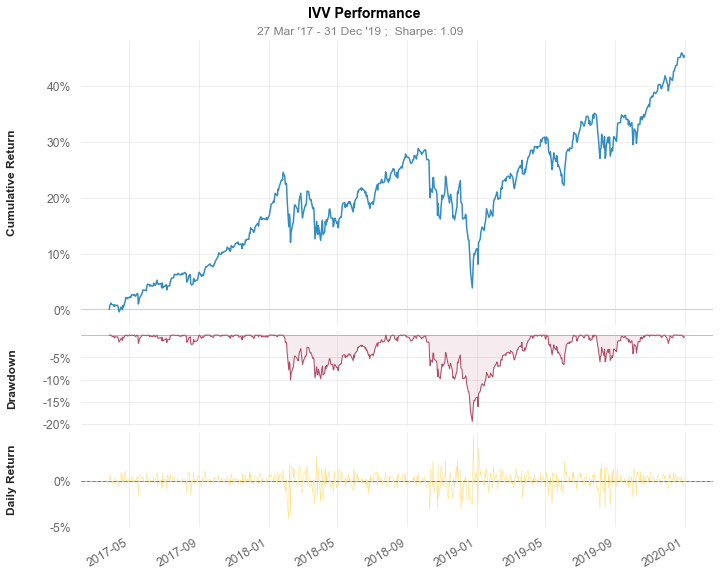

In [18]:
qs.plots.snapshot(returns['IVV'], title='IVV Performance')

'stats_table' of performanceanalytics gives the summary statistics. 

In [19]:
pat.stats_table(returns)

,IVV
Observations,696.000000
NAs,0.000000
Minimum,-0.041365
Quartile 1,-0.002217
Median,0.000674
Artithmetic Mean,0.000573
Geometric Mean,0.000539
Quartile 3,0.004734
Maximum,0.049049
SE Mean,0.000315


quantstats's 'reports' 'metrics' give a lot more detail related to the returns.

In [20]:
qs.reports.metrics(returns['IVV'])

                    Strategy
------------------  ----------
Start Period        2017-03-28
End Period          2019-12-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   45.46%
CAGR%               14.53%
Sharpe              1.09
Sortino             1.5
Max Drawdown        -19.38%
Longest DD Days     203

Payoff Ratio        0.95
Profit Factor       1.23
Common Sense Ratio  1.06
CPC Index           0.66
Tail Ratio          0.86
Outlier Win Ratio   3.63
Outlier Loss Ratio  4.53

MTD                 2.93%
3M                  9.53%
6M                  10.92%
YTD                 31.25%
1Y                  32.45%
3Y (ann.)           14.53%
5Y (ann.)           14.53%
10Y (ann.)          14.53%
All-time (ann.)     14.53%

Avg. Drawdown       -1.28%
Avg. Drawdown Days  15
Recovery Factor     2.35
Ulcer Index         1.05
